In [0]:
%tensorflow_version 2.x

In [0]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from glob import glob
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [4]:
tf.random.set_seed(42)
tf.__version__

'2.2.0-rc2'

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
CATEGORIES = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen", "Loose Silky-bent",
              "Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"]
NUM_CATEGORIES = len(CATEGORIES)

In [0]:
train ='/content/drive/My Drive/train'
test ='/content/drive/My Drive/test'

In [8]:
for category in CATEGORIES:
    print('{} {} images'.format(category, len(os.listdir(os.path.join(train, category)))))

Black-grass 263 images
Charlock 390 images
Cleavers 287 images
Common Chickweed 611 images
Common wheat 221 images
Fat Hen 475 images
Loose Silky-bent 654 images
Maize 221 images
Scentless Mayweed 516 images
Shepherds Purse 231 images
Small-flowered Cranesbill 496 images
Sugar beet 395 images


In [9]:
seed_df_train = []

for category_num, category in enumerate(CATEGORIES):
    for file in os.listdir(os.path.join(train, category)):
        seed_df_train.append(['/content/drive/My Drive/train/{}/{}'.format(category, file), category_num, category])
        
seed_df_train = pd.DataFrame(seed_df_train, columns=['file', 'category_num', 'category'])

print('Training Data: ',seed_df_train.shape)

Training Data:  (4760, 3)


In [10]:
seed_df_train.head()

,file,category_num,category
0,/content/drive/My Drive/train/Black-grass/0260...,0,Black-grass
1,/content/drive/My Drive/train/Black-grass/078e...,0,Black-grass
2,/content/drive/My Drive/train/Black-grass/0ace...,0,Black-grass
3,/content/drive/My Drive/train/Black-grass/0bb7...,0,Black-grass
4,/content/drive/My Drive/train/Black-grass/0c67...,0,Black-grass


In [11]:
seed_df_train.tail()

,file,category_num,category
4755,/content/drive/My Drive/train/Sugar beet/fbb26...,11,Sugar beet
4756,/content/drive/My Drive/train/Sugar beet/fed94...,11,Sugar beet
4757,/content/drive/My Drive/train/Sugar beet/f861c...,11,Sugar beet
4758,/content/drive/My Drive/train/Sugar beet/fbec8...,11,Sugar beet
4759,/content/drive/My Drive/train/Sugar beet/f8bf2...,11,Sugar beet


In [0]:
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               shear_range=0.2,
                                                               zoom_range=0.3)

In [0]:
x_train=[]
for i in range(len(seed_df_train)):
  img  = tf.keras.preprocessing.image.load_img(seed_df_train['file'][i])
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = cv2.resize(img_array, (128,128,))
  x_train.append(img_array)

In [0]:
x_train=np.array(x_train)/255.0

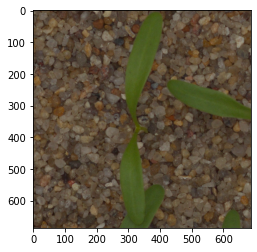

In [15]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap='gray') 
plt.show()

In [0]:
y = seed_df_train['category_num']
y = to_categorical(y, num_classes = len(CATEGORIES))

In [0]:
model = Sequential()
model.add(BatchNormalization(input_shape=(128,128,3)))
model.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), activation='relu'))
model.add(Conv2D(32, kernel_size = (3,3), strides = (1,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 200)               24601800  
_________________________________________________________________
dropout (Dropout)            (None, 200)               0

In [0]:
x__train, x__test, y__train, y__test = train_test_split(x_train, y, test_size = 0.2, random_state= 123)

In [0]:
img_generator.fit(x__train)

In [22]:
history=model.fit_generator(img_generator.flow(x__train, y__train, batch_size=32),
                    steps_per_epoch=len(x__train) / 32, epochs=32,
                    validation_data=img_generator.flow(x__test,y__test,batch_size=32),
                    validation_steps= len(x__test)/32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/32
119/119 [==============================] - 187s 2s/step - loss: 2.8253 - accuracy: 0.1991 - val_loss: 2.4343 - val_accuracy: 0.1765
Epoch 2/32
119/119 [==============================] - 185s 2s/step - loss: 1.9042 - accuracy: 0.3390 - val_loss: 2.0580 - val_accuracy: 0.2983
Epoch 3/32
119/119 [==============================] - 186s 2s/step - loss: 1.6217 - accuracy: 0.4443 - val_loss: 1.6405 - val_accuracy: 0.4401
Epoch 4/32
119/119 [==============================] - 186s 2s/step - loss: 1.4319 - accuracy: 0.5123 - val_loss: 1.4407 - val_accuracy: 0.4916
Epoch 5/32
119/119 [==============================] - 187s 2s/step - loss: 1.3094 - accuracy: 0.5583 - val_loss: 1.1778 - val_accuracy: 0.6282
Epoch 6/32
119/119 [==============================] - 186s 2s/step - loss: 1.2663 - accuracy: 0.5772 - val_loss: 1.1456 - val_accuracy: 0.6019
Epoch 7/32
119/119 [==============================] - 187s 2s/step

Predicted model accuracy : 0.8403361439704895


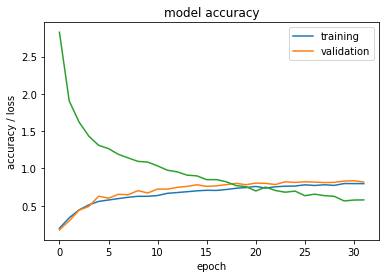

In [24]:
# Predict the accuracy for both train and validation data
loss,accuracy  = model.evaluate(x__test, y__test, verbose=False)
print("Predicted model accuracy :" , accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [0]:
os.chdir('/content/drive/My Drive')

In [0]:
    data = []
    filenames = []
    
    images = os.listdir(test)
    for imageFileName in images:
        imageFullPath = os.path.join(test, imageFileName)
        img = tf.keras.preprocessing.image.load_img(imageFullPath)
        arr = tf.keras.preprocessing.image.img_to_array(img)  
        arr = cv2.resize(arr, (128,128)) 
        data.append(arr)
        filenames.append(imageFileName)

In [0]:
data=np.array(data)/255.0

In [0]:
y_pred=model.predict(data)

In [30]:
y_pred

array([[1.5452573e-04, 9.0344006e-04, 9.6652484e-06, ..., 2.6493817e-06,
        5.3486845e-04, 9.9732792e-01],
       [1.7831410e-09, 5.9870344e-09, 1.1747593e-10, ..., 3.9453487e-05,
        1.8921228e-04, 2.3330564e-05],
       [6.6189818e-02, 9.6601427e-10, 6.8678560e-07, ..., 2.7523046e-07,
        4.4768164e-04, 6.5367197e-04],
       ...,
       [1.5747519e-05, 2.1624979e-02, 6.6123926e-04, ..., 1.5629397e-05,
        1.4291365e-04, 9.7498816e-01],
       [4.0153429e-07, 9.5849246e-01, 3.9767697e-02, ..., 2.4206349e-05,
        1.6719800e-04, 1.5155259e-03],
       [1.3298902e-01, 1.3366436e-10, 3.0726346e-06, ..., 3.1842701e-13,
        7.1183508e-09, 6.2421051e-08]], dtype=float32)